In [3]:
from scipy.io import netcdf, loadmat
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
from python_functions import *
sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
#sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML
from python_functions import *

In [18]:
run_36km = MonitorRead()
run_36km.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400])
#run_ERA_tempcorr0.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000,3110400,3628800,4147200,4665600,5184000,5702400,6220800,6739200,7257600,7776000,8294400,8812800])
run_36km.title('ERA run with OBS*0.5','grey')

run_18km = MonitorRead()
run_18km.readData('/hpcdata/scratch/am8e13/arctic420x384/run_tempcorr/results/',[0,311040,622080])
#run_18km.readDynStDiag('/hpcdata/scratch/am8e13/arctic420x384/run_tempcorr/results/',[0,311040,622080,933120,1244160,1555200,1814400,2125440,2436480,2643840,2954880,3265920,3576960,3888000,4199040,4510080,4821120,5132160])
run_18km.title('18km simul','red')#3784320,

run_9km= MonitorRead()
run_9km.readData('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/',[0])
run_9km.readDynStDiag('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/',[0])
run_9km.title('9km','blue')

run_sponge = MonitorRead()
run_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600])
run_sponge.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600])
run_sponge.title('sponge','black')

In [19]:
titles_lv = { 'run_36km' : 'ERA 0.5','run_18km' : 'run 18km' , 'run_9km' : 'run 9km' , 'run_sponge' : 'run_sponge' }
monitor_list1 = {'run_36km' : run_36km , \
               'run_18km' : run_18km ,\
               'run_9km' : run_9km, \
                'run_sponge' : run_sponge }

9km blue
18km simul red
sponge black
ERA run with OBS*0.5 grey
9km blue
18km simul red
sponge black
ERA run with OBS*0.5 grey
9km blue
18km simul red
sponge black
ERA run with OBS*0.5 grey


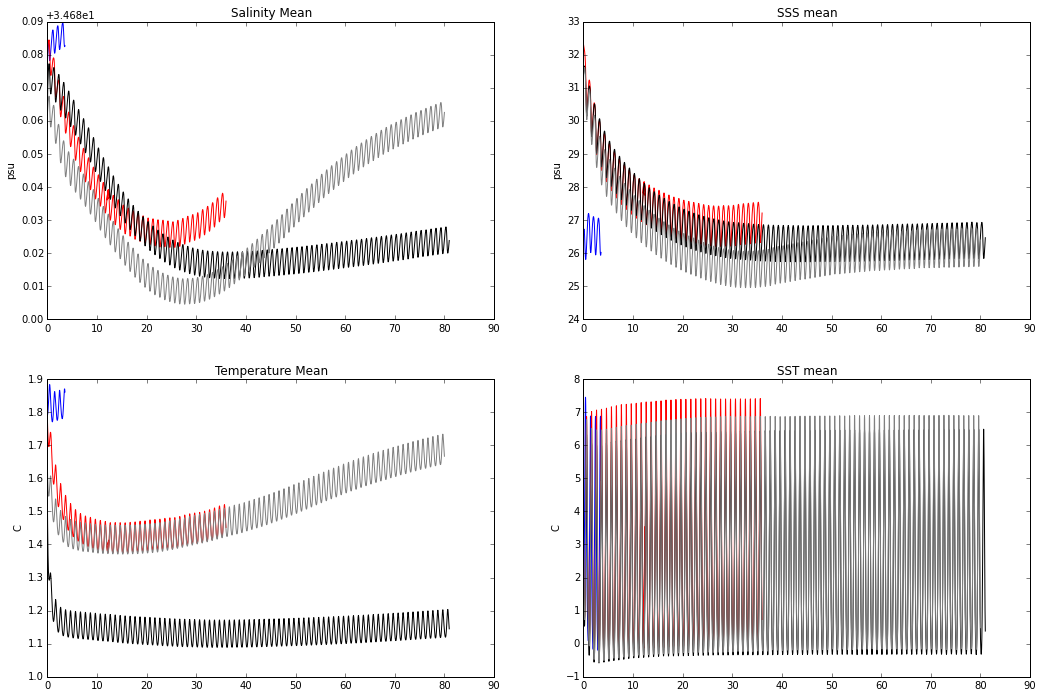

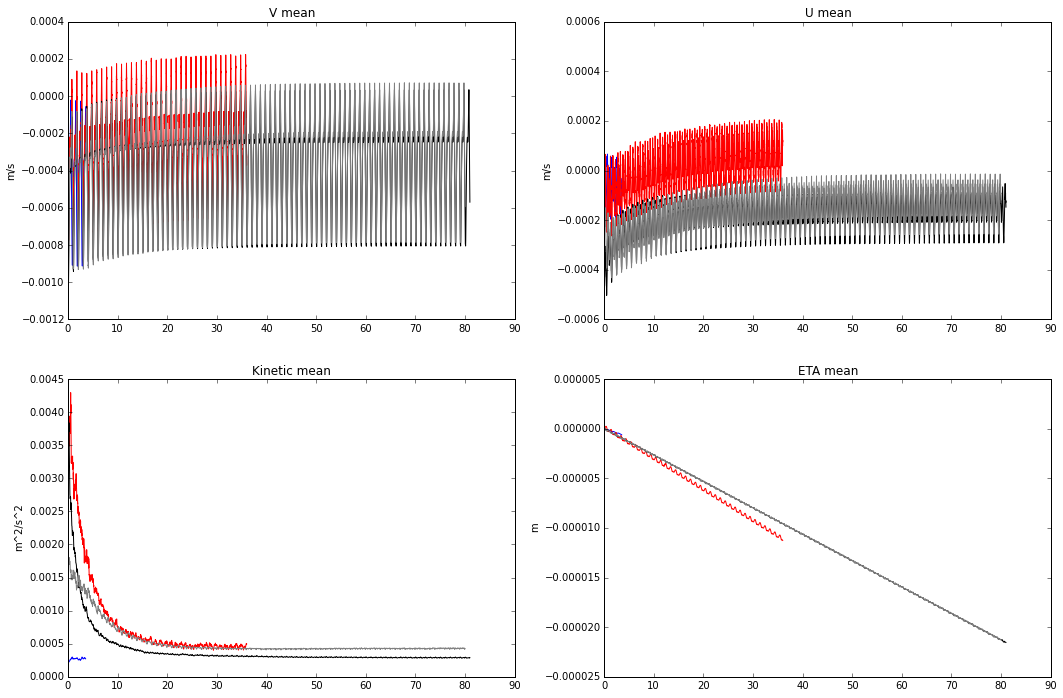

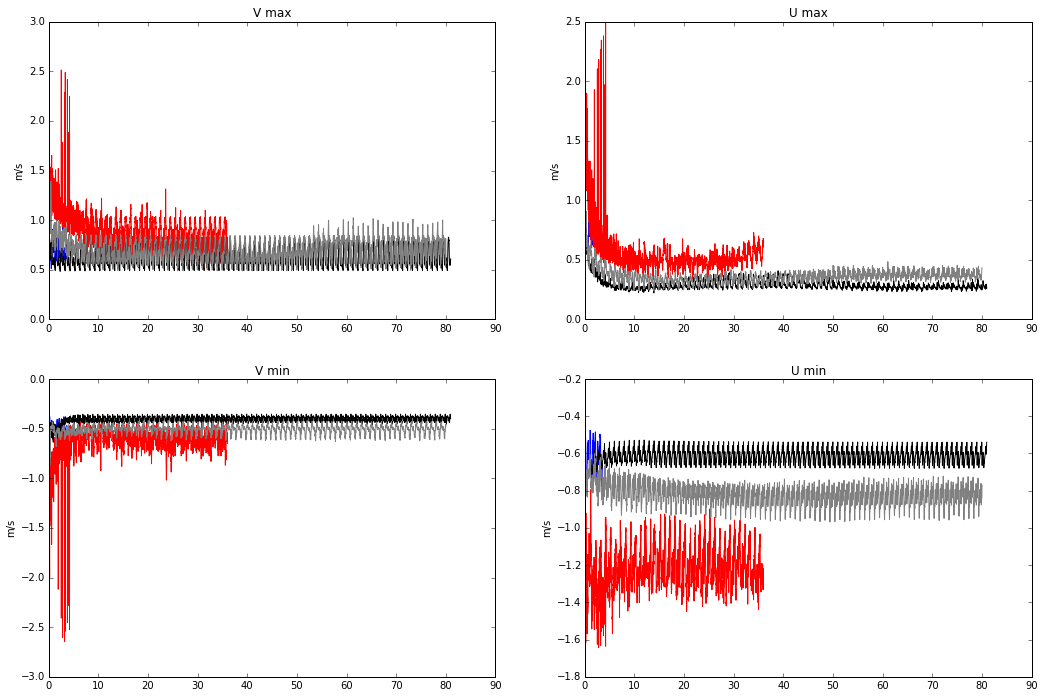

In [20]:
plot_monitor(monitor_list1,['salt_mean','sss_mean','theta_mean','sst_mean'])
plot_monitor(monitor_list1,['vvel_mean','uvel_mean','ke_mean','eta_mean'])
plot_monitor(monitor_list1,['vvel_max','uvel_max','vvel_min','uvel_min'])

#plot_monitor(monitor_list1,['seaice_area_mean','seaice_heff_mean','seaice_heff_max','seaice_heff_min'])

In [6]:
time_new2_eta = [182, 186, 192 ,198, 214, 240]
print time_new2_eta
time_new18_eta = [364, 378, 390, 400, 430, 490]
print time_new18_eta

[182, 186, 192, 198, 214, 240]
[364, 378, 390, 400, 430, 490]


In [7]:
file2read = netcdf.NetCDFFile("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/state.nc",'r')
run_pert2_ETA = file2read.variables['Eta']
run_pert2_ETA = run_pert2_ETA[time_new2_eta]*1
run_pert2_time = file2read.variables['T']
run_pert2_time = run_pert2_time[time_new2_eta]*1
time2_0 = file2read.variables['T']
time2_0 = time2_0[0]*1

In [8]:
file2read = netcdf.NetCDFFile("/hpcdata/scratch/am8e13/arctic420x384/run_perturbation/results/state.nc",'r')
run_pert18_ETA = file2read.variables['Eta']
run_pert18_ETA = run_pert18_ETA[time_new18_eta]*1
run_pert18_time = file2read.variables['T']
run_pert18_time = run_pert18_time[time_new18_eta]*1
time18_0 = file2read.variables['T']
time18_0 = time18_0[0]*1

In [9]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results36km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
bathy2=file2read.variables['HFacC']
bathy2=bathy2[:]*1

# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results18km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
bathy18=file2read.variables['HFacC']
bathy18=bathy18[:]*1

In [10]:
run_pert2_ETA[:,bathy2[0,:,:]==0] = np.nan
run_pert18_ETA[:,bathy18[0,:,:]==0] = np.nan

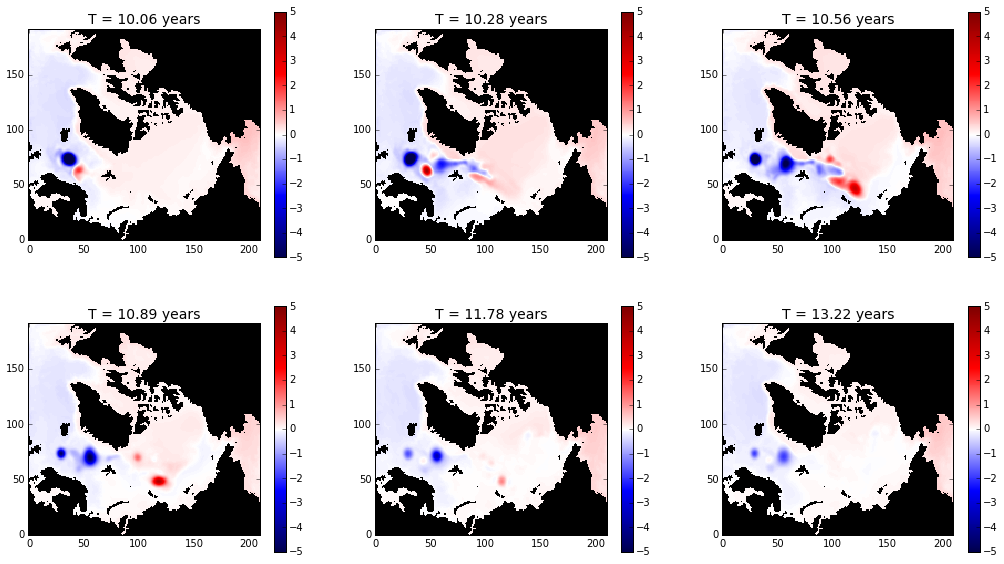

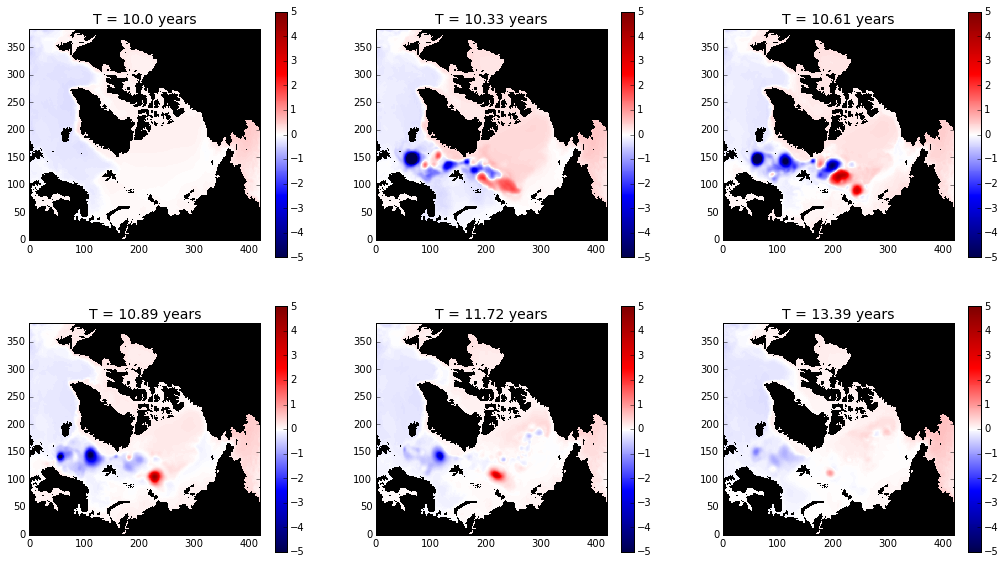

In [11]:
plot_field(run_pert2_ETA,(run_pert2_time - time2_0)/(60*60*24*360),-5,5,matplotlib.cm.seismic,'black','')
plot_field(run_pert18_ETA,(run_pert18_time - time18_0)/(60*60*24*360),-5,5,matplotlib.cm.seismic,'black','')

In [7]:
file2read = netcdf.NetCDFFile("/hpcdata/scratch/am8e13/arctic420x384/run_tempcorr/toglue/state.nc",'r')
run_pert18_ETA = file2read.variables['S']
run_pert18_ETA = run_pert18_ETA[0,:,:,:]*1
run_pert18_time = file2read.variables['T']
run_pert18_time = run_pert18_time[0]*1

In [8]:
run_pert18_time/(60*60*24*360)

198.0

In [ ]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results9km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
bathy2=file2read.variables['HFacC']
bathy2=bathy2[:]*1

In [191]:
#name = '/hpcdata/scratch/am8e13/run_template_9km/SALT_840x768_from18km'
name = '/noc/users/am8e13/MITgcm_mio/SALT_840x768_from18km'
data = komod.mitbin(name,xdim=768,ydim=840,zdim=50,datatype='float32')
#name = '/hpcdata/scratch/am8e13/run_template_9km/SALT_840x768_from18km_mod'
name = '/noc/users/am8e13/MITgcm_mio/SALT_840x768_from18km_mod'
data_mod = komod.mitbin(name,xdim=768,ydim=840,zdim=50,datatype='float32')
#name = '/hpcdata/scratch/am8e13/run_template_9km/SALT_840x768_from18km_mod'
name = '/hpcdata/scratch/am8e13/run_template_9km/run_template/WOA05_SALT_JAN_840x768x50_arctic'
data_init = komod.mitbin(name,xdim=768,ydim=840,zdim=50,datatype='float32')
#data[0,bathy2==0]=np.nan
#data_mod[0,bathy2==0]=np.nan

In [130]:
data_9 = StateRead()
data_9.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/",[0,1,2,3])
#data_ERA_tempmod0.title('ERA run with Obs*0.5')

In [289]:
data_9 = StateRead()
data_9.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/",[0,1,2,3])
#data_ERA_tempmod0.title('ERA run with Obs*0.5')
data_9new = StateRead()
data_9new.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/",[0,1])
#data_ERA_tempmod0.title('ERA run with Obs*0.5')

In [102]:
data_9old = StateRead()
data_9old.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/oldrun/",[0,1,2,3,4])

In [103]:
data_9ne = StateRead()
data_9ne.readData("/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/nerun/",[0,1,2,3,4,5,6,7])

In [2]:
def interact(field,cmap1,vimin1,vimin2,vimax1,vimax2,time1,time2,z1,z2):
    def plot_field2(vimin=1,vimax=20,time=0,Z=0):
        # This function plots a 2D field, the field is meant to have NaNs on the land place                                                
        # vimin is the minimun, vimax is the maximum, setbad is the NaN color, unity is the unity in the colorbar                          
        # cmap is a colomap                                                                                                               
        fig,axes = plt.subplots(1,1)
        masked_array = np.ma.array(field[time,Z,:,:], mask=np.isnan(field[time,Z,:,:]))
        cmap= cmap1
        cmap.set_bad('grey',1.)
        ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        cbar = fig.colorbar(ca )
        fig.subplots_adjust(right=2.4,top=2)
        return plot_field2
        
    w = interactive(plot_field2,vimin=(vimin1,vimin2),vimax=(vimax1,vimax2),time=(time1,time2),Z=(z1,z2))
    display(w)
#interact(data_9old.data['T'][:,:,:,:],matplotlib.cm.jet,-1,30,0,40,time1=0,time2=3,z1=0,z2=50)